In [1]:
library(ggplot2)

In [2]:
setwd('../../plots')

In [3]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

,chr,length
,<fct>,<int>
1,chr1,224244399
2,chr2A,108022953
3,chr2B,128755405
4,chr3,196562556
5,chr4,189151597
6,chr5,159319378


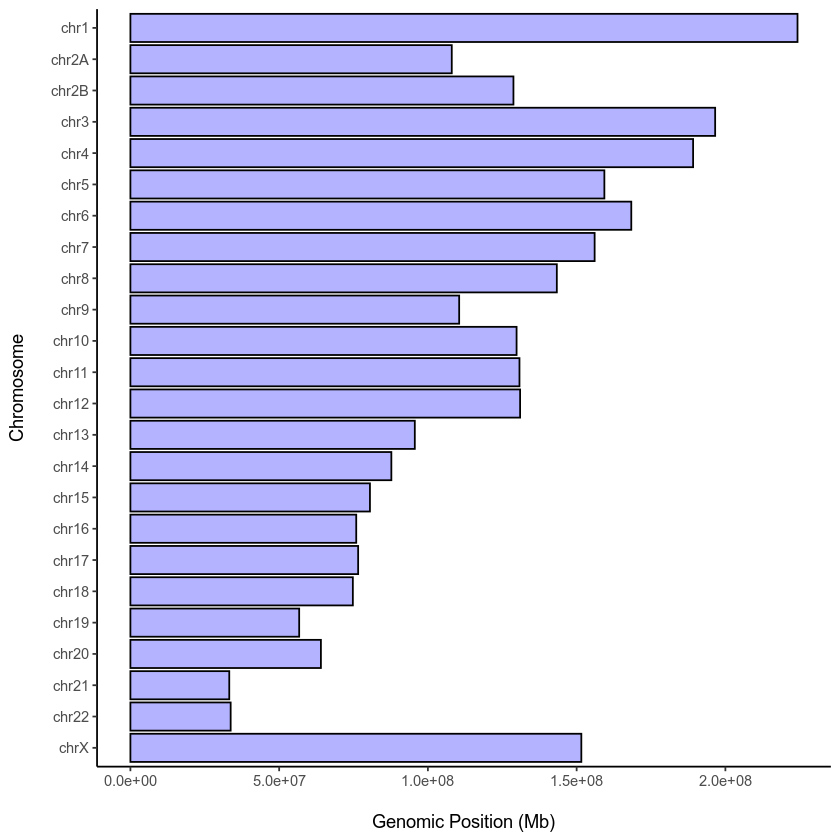

In [4]:
ggplot(chrs, aes(x = chr, y = length)) + geom_bar(stat = "identity", fill = "blue", color = "black", alpha = 0.3) +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + theme_classic() +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)')

In [5]:
intervals = read.csv('../data/annotations/panTro6_TADs.bed', sep = '\t', header = FALSE)
names(intervals) <- c('chr','start','end','w','x','y','z','a')
intervals$chr <- as.factor(intervals$chr)

In [6]:
head(intervals)

,chr,start,end,w,x,y,z,a
,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,chr1,394452,543414,1.0226343,150000,150000,150000,150000
2,chr1,553368,720938,0.8254987,0,140000,140000,0
3,chr1,1404000,2025870,1.4638769,350000,520000,520000,540000
4,chr1,2426223,4649193,1.8231615,2080000,1630000,2090000,2060000
5,chr1,2500179,3198029,1.4803405,710000,260000,710000,710000
6,chr1,2510093,2734436,1.1464628,230000,230000,230000,230000


Warning message:
“Removed 64 rows containing missing values (geom_rect).”


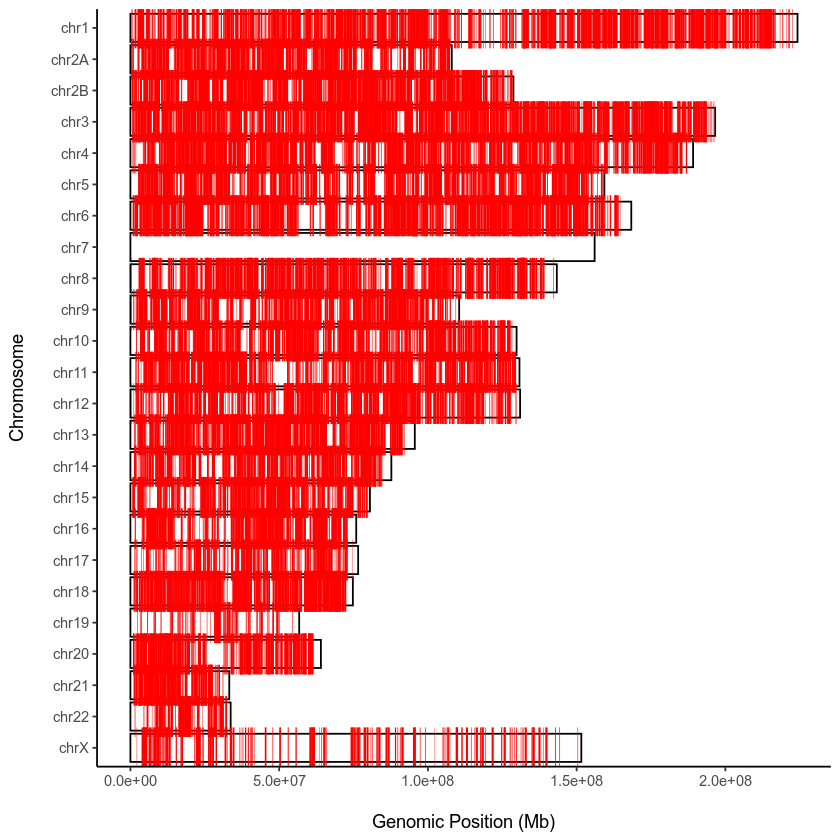

In [16]:
# plot the rectangles
TADs_plot <- ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = 'white', color = "black", alpha = 0.3) +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + theme_classic() +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    #geom_rect(data = intervals, mapping = aes(xmin = 'chr1', xmax = 'chr1', ymin = 40000000, ymax = 100000000), color = 'red', alpha = 0.7) +
    geom_rect(data = intervals, mapping = aes(xmin = chr, xmax = chr, ymin = start, ymax = end), color = 'red', alpha = 0.3, size = 11.5)
    
TADs_plot

In [17]:
pdf('TADs_plot.pdf', width = 15, height = 12)
TADs_plot
dev.off()

Warning message:
“Removed 64 rows containing missing values (geom_rect).”


png 
  2